
# Análisis Exploratorio de Datos (EDA) 

(I) Se realiza un EDA exhaustivo sobre la serie de precios de Bitcoin, considerando:
- Identificación y manejo de datos faltantes.
- Visualización detallada usando gráficos de velas y histogramas de volumen con Plotly.
- Gráficos de subseries por semana, mes y año, incluyendo análisis de estacionariedad mediante ACF y pruebas estadísticas (Ljung-Box, Dickey-Fuller).
- Aplicación de medias móviles para remover tendencia y asegurar estacionariedad.

(II) Replicación del EDA en series temporales de:
- **Retorno acumulado diario**: Calculado como la suma de retornos diarios hasta el tiempo T.
- **Volatilidad**: Determinada como la desviación estándar de los retornos diarios, evaluada en ventanas de ω = 7, 14, 21 y 28 días.

Cada análisis incluye pruebas estadísticas y transformaciones para asegurar la independencia de los residuos y la adecuación de los modelos predictivos.

## Limpieza y Preparación de Datos


   - Se importa el archivo CSV que contiene los datos históricos de Bitcoin en un DataFrame de pandas para su análisis.
   - Las columnas se convierten al tipo numérico, permitiendo análisis cuantitativo sin errores de conversión.
   - La columna `Date` se convierte a formato de fecha yse establece como índice en orden ascendente para otganizar la serie cronologicamente.

In [44]:
import pandas as pd

# Paso 1: Cargar el archivo CSV en el DataFrame
Historial_precios = pd.read_csv("Bitcoin_Historical_Data.csv")

# Paso 2: Limpiar las columnas numéricas eliminando comas y caracteres no numéricos
num_cols = ['Price', 'Open', 'High', 'Low', 'Change %']
for col in num_cols:
    Historial_precios[col] = Historial_precios[col].replace({',': '', '%': ''}, regex=True)
    Historial_precios[col] = pd.to_numeric(Historial_precios[col], errors='coerce')  # Convertir a numérico

# Paso 3: Convertir 'Date' a datetime, establecer como índice y ordenar por fecha
Historial_precios['Date'] = pd.to_datetime(Historial_precios['Date'])
Historial_precios.sort_values(by='Date', ascending=True, inplace=True)
Historial_precios.set_index('Date', inplace=True)

# Confirmar la limpieza y orden de los datos
print("Datos después de la limpieza y orden:")
Historial_precios


Datos después de la limpieza y orden:


Price     Open     High      Low     Vol.  Change %
Date                                                             
2010-07-18      0.1      0.0      0.1      0.1    0.08K      0.00
2010-07-19      0.1      0.1      0.1      0.1    0.57K      0.00
2010-07-20      0.1      0.1      0.1      0.1    0.26K      0.00
2010-07-21      0.1      0.1      0.1      0.1    0.58K      0.00
2010-07-22      0.1      0.1      0.1      0.1    2.16K      0.00
...             ...      ...      ...      ...      ...       ...
2024-03-20  67854.0  62046.8  68029.5  60850.9  133.53K      9.35
2024-03-21  65503.8  67860.0  68161.7  64616.1   75.26K     -3.46
2024-03-22  63785.5  65501.5  66633.3  62328.3   72.43K     -2.62
2024-03-23  64037.8  63785.6  65972.4  63074.9   35.11K      0.40
2024-03-24  67211.9  64036.5  67587.8  63812.9   65.59K      4.96

[4999 rows x 6 columns]


## Cálculo de Retornos y Volatilidad

   - Se calcula el retorno diario y se agrega como una nueva columna `Retorno_Diario`.
   - El retorno acumulado  se obtiene sumando los retornos diarios a lo largo del tiempo, mostrando la acumulación de ganancias o pérdidas en la columna `Retorno_Acumulado`.
   - La volatilidad se calcula **(desviación estándar de los retornos diarios)** para ventanas móviles de 7, 14, 21 y 28 días. Cada ventana se agrega al DataFrame (`Volatilidad_7`, `Volatilidad_14`, etc.) 


In [45]:
# Paso 5: Calcular el retorno diario y agregarlo como una columna 'Retorno_Diario'
Historial_precios['Retorno_Diario'] = Historial_precios['Price'].pct_change()

# Paso 6: Calcular el retorno acumulado y agregarlo como 'Retorno_Acumulado'
Historial_precios['Retorno_Acumulado'] = Historial_precios['Retorno_Diario'].cumsum()

# Paso 7: Calcular la volatilidad para cada ventana y agregarla al DataFrame
ventanas = [7, 14, 21, 28]
for ventana in ventanas:
    Historial_precios[f'Volatilidad_{ventana}'] = Historial_precios['Retorno_Diario'].rolling(window=ventana).std()

# Confirmar el cálculo de retornos y volatilidad
print("Datos después del cálculo de retornos y volatilidad:")
Historial_precios


Datos después del cálculo de retornos y volatilidad:


Price     Open     High      Low     Vol.  Change %  \
Date                                                                
2010-07-18      0.1      0.0      0.1      0.1    0.08K      0.00   
2010-07-19      0.1      0.1      0.1      0.1    0.57K      0.00   
2010-07-20      0.1      0.1      0.1      0.1    0.26K      0.00   
2010-07-21      0.1      0.1      0.1      0.1    0.58K      0.00   
2010-07-22      0.1      0.1      0.1      0.1    2.16K      0.00   
...             ...      ...      ...      ...      ...       ...   
2024-03-20  67854.0  62046.8  68029.5  60850.9  133.53K      9.35   
2024-03-21  65503.8  67860.0  68161.7  64616.1   75.26K     -3.46   
2024-03-22  63785.5  65501.5  66633.3  62328.3   72.43K     -2.62   
2024-03-23  64037.8  63785.6  65972.4  63074.9   35.11K      0.40   
2024-03-24  67211.9  64036.5  67587.8  63812.9   65.59K      4.96   

            Retorno_Diario  Retorno_Acumulado  Volatilidad_7  Volatilidad_14  \
Date                                                                           
2010-07-18             NaN                NaN            NaN             NaN   
2010-07-19        0.000000           0.000000            NaN             NaN   
2010-07-20        0.000000           0.000000            NaN             NaN   
2010-07-21        0.000000           0.000000            NaN             NaN   
2010-07-22        0.000000           0.000000            NaN             NaN   
...                    ...                ...            ...             ...   
2024-03-20        0.093537          23.719802       0.060681        0.044544   
2024-03-21       -0.034636          23.685166       0.061287        0.045543   
2024-03-22       -0.026232          23.658934       0.061256        0.045630   
2024-03-23        0.003955          23.662889       0.057331        0.045643   
2024-03-24        0.049566          23.712455       0.057684        0.047754   

            Volatilidad_21  Volatilidad_28  
Date                                        
2010-07-18             NaN             NaN  
2010-07-19             NaN             NaN  
2010-07-20             NaN             NaN  
2010-07-21             NaN             NaN  
2010-07-22             NaN             NaN  
...                    ...             ...  
2024-03-20        0.044059        0.043374  
2024-03-21        0.044563        0.044045  
2024-03-22        0.044883        0.044397  
2024-03-23        0.044842        0.044385  
2024-03-24        0.045898        0.045030  

[4999 rows x 12 columns]

### Identificación e Imputación de Datos Faltantes

1. **Identificación de Datos Faltantes**:
   - Usamos `isna().sum()` en cada columna de los conjuntos (`Price`, `Retorno_Diario`, y `Volatilidad`) para contar los valores faltantes. 

2. **Imputación de Datos Faltantes**:
   - Se aplicó una técnica de imputación basada en el **Fill-foward** (`fillna(method='ffill')` y `fillna(method='bfill')`). Este método reemplaza los valores faltantes en secuencia con el último valor válido previo o siguiente,

Primeros valores de 'Vol.' después del ajuste:
Date
2010-07-18      80.0
2010-07-19     570.0
2010-07-20     260.0
2010-07-21     580.0
2010-07-22    2160.0
Name: Vol., dtype: float64


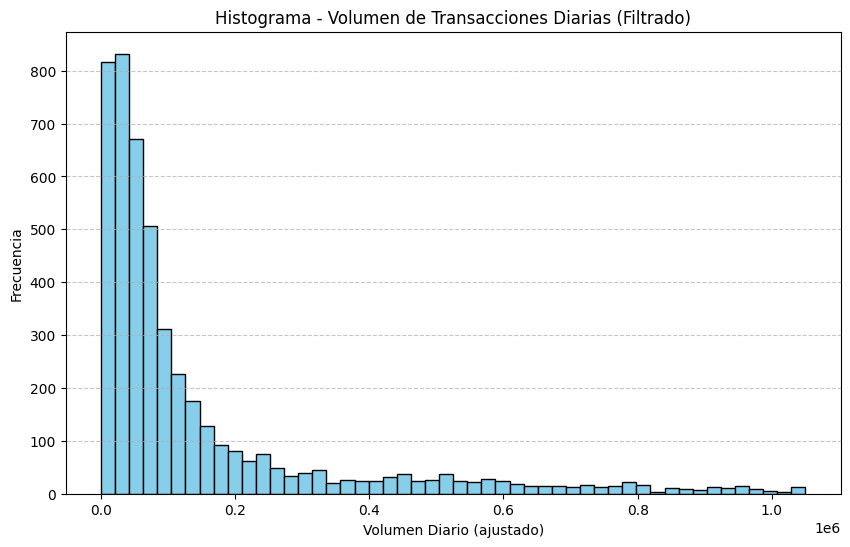

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Función para convertir valores en 'K', 'M', o 'B' a su valor numérico
def ajustar_formato(val):
    if isinstance(val, str):
        # Remover comas y letras "K", "M", o "B"
        numeric_part = val.replace(",", "").replace("K", "").replace("M", "").replace("B", "").strip()
        # Convertir la parte numérica a float
        numeric_value = float(numeric_part)
        # Multiplicar según la notación
        if "K" in val:
            return numeric_value * 1_000
        elif "M" in val:
            return numeric_value * 1_000_000
        elif "B" in val:
            return numeric_value * 1_000_000_000
        else:
            return numeric_value
    return float(val)

# Paso 1: Cargar los datos desde el archivo CSV
# Historial_precios = pd.read_csv('Bitcoin_Historical_Data.csv')

# Convertir la columna 'Vol.' al formato numérico usando la función ajustada
Historial_precios['Vol.'] = Historial_precios['Vol.'].astype(str).apply(ajustar_formato)

# Confirmación de los primeros valores para verificar la conversión
print("Primeros valores de 'Vol.' después del ajuste:")
print(Historial_precios['Vol.'].head())

# Enfoque 2: Filtrar valores extremos para mejorar la visualización
# Definir un umbral para filtrar valores extremos (por ejemplo, el percentil 95)
umbral = Historial_precios['Vol.'].quantile(0.95)

# Filtrar los datos para el histograma
volumen_filtrado = Historial_precios[Historial_precios['Vol.'] <= umbral]['Vol.']

# Graficar el histograma del volumen filtrado
plt.figure(figsize=(10, 6))
plt.hist(volumen_filtrado, bins=50, color='skyblue', edgecolor='black')
plt.title('Histograma - Volumen de Transacciones Diarias (Filtrado)')
plt.xlabel('Volumen Diario (ajustado)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Interpretación del Histograma - Volumen de Transacciones Diarias (Filtrado)


1. **Distribución Sesgada a la Izquierda**: La mayor parte del volumen de transacciones está concentrada en valores bajos, observándose una alta frecuencia en los primeros intervalos que disminuye rápidamente a medida que aumentan los valores de volumen. Esto refleja una fuerte asimetría en la actividad transaccional diaria, indicando que las transacciones más pequeñas son las más comunes.

2. **Baja Frecuencia en Volúmenes Altos**: A partir de aproximadamente 0.2 millones, la frecuencia de transacciones disminuye de forma notable, lo cual sugiere que los volúmenes altos de transacción son menos frecuentes en el conjunto de datos. Esto podría reflejar actividades esporádicas o transacciones atípicas con un volumen inusualmente elevado.

3. **Patrón de Actividad Habitual**: El gráfico indica que la mayoría de las transacciones diarias son de volúmenes relativamente pequeños, mientras que los volúmenes mayores ocurren de forma menos frecuente. Esta tendencia puede ser indicativa de una actividad transaccional consistente, en donde los eventos de volumen alto son excepcionales.



La imputación completó los valores faltantes en todas las columnas nesesarias para el ejericio,pero **Vol.** (Volumen), al tener  4,999 parece  ser irreparable o peude etar mal codificada.


### Visualización de Series de Tiempo con Gráficos de Velas y Distribución del Volumen


1. **Gráficos de Velas para Precio, Volatilidad y Retorno Acumulado Diario**: Para cada serie temporal (Precio, Volatilidad y Retorno Acumulado Diario), se generaron gráficos de velas utilizando la librería Plotly. Estos gráficos ayudan a observar los patrones diarios en términos de apertura, cierre, máximos y mínimos. La volatilidad se calculó para ventanas de 7, 14, 21 y 28 días,.

2. **Histograma del Volumen Diario de Transacciones**: La columna *Vol.* se transformó a formato numérico para representar correctamente las cantidades con notaciones como *K* y *M*. Posteriormente, se utilizó un histograma para visualizar la distribución de este volumen, lo que permite identificar picos y patrones de trading en días de alta y baja actividad,


In [16]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px


# Gráfico de velas para la columna 'Price'
fig_price = go.Figure(data=[go.Candlestick(
    x=Historial_precios.index,
    open=Historial_precios['Open'],
    high=Historial_precios['High'],
    low=Historial_precios['Low'],
    close=Historial_precios['Price']
)])
fig_price.update_layout(
    title='Gráfico de Velas - Precio de Bitcoin',
    xaxis_title='Fecha',
    yaxis_title='Precio (USD)',
    yaxis_tickformat=".2f"
)
fig_price.show()

# Gráficos de velas para Volatilidad con diferentes ventanas (aumentando grosor de líneas)
for ventana in [7, 14, 21, 28]:
    fig_volatilidad = go.Figure(data=[go.Candlestick(
        x=Historial_precios.index,
        open=Historial_precios[f'Volatilidad_{ventana}'],
        high=Historial_precios[f'Volatilidad_{ventana}'],
        low=Historial_precios[f'Volatilidad_{ventana}'],
        close=Historial_precios[f'Volatilidad_{ventana}'],
        increasing_line=dict(width=3),  # Grosor de línea aumentado
        decreasing_line=dict(width=3)
    )])
    fig_volatilidad.update_layout(
        title=f'Gráfico de Velas - Volatilidad ({ventana} días)',
        xaxis_title='Fecha',
        yaxis_title=f'Volatilidad {ventana} días',
        yaxis_tickformat=".2f"
    )
    fig_volatilidad.show()

# Gráfico de velas para Retorno Acumulado Diario (aumentando grosor de líneas)
fig_retorno = go.Figure(data=[go.Candlestick(
    x=Historial_precios.index,
    open=Historial_precios['Retorno_Acumulado'],
    high=Historial_precios['Retorno_Acumulado'],
    low=Historial_precios['Retorno_Acumulado'],
    close=Historial_precios['Retorno_Acumulado'],
    increasing_line=dict(width=3),  # Grosor de línea aumentado
    decreasing_line=dict(width=3)
)])
fig_retorno.update_layout(
    title='Gráfico de Velas - Retorno Acumulado Diario',
    xaxis_title='Fecha',
    yaxis_title='Retorno Acumulado',
    yaxis_tickformat=".2f"
)
fig_retorno.show()

# Histograma del Volumen diario ajustado
fig_volumen = px.histogram(Historial_precios, x='Vol.', nbins=50, title='Histograma - Volumen de Transacciones Diarias')
fig_volumen.update_layout(xaxis_title='Volumen Diario (ajustado)', yaxis_title='Frecuencia')
fig_volumen.show()


### Gráfico de Velas - Precio de Bitcoin

Este gráfico muestra la evolución del precio de Bitcoin en el tiempo. Se observa una tendencia alcista significativa desde 2017, con picos notables en 2018 y un incremento aún mayor entre 2020 y 2021, alcanzando máximos históricos. La volatilidad es alta, especialmente en períodos de rápida subida o bajada de precio. 

### Gráfico de Velas - Retorno Acumulado Diario

El gráfico de retorno acumulado diario muestra el crecimiento acumulativo del rendimiento de Bitcoin desde el inicio de los registros. A lo largo del tiempo, se observa una tendencia ascendente constante en el retorno acumulado, lo cual refleja la capacidad de Bitcoin para generar rendimientos significativos en el largo plazo. L

### Gráficos de Velas - Volatilidad (7, 14, 21, y 28 días)

Estos gráficos de volatilidad con diferentes ventanas muestran la variabilidad del precio de Bitcoin en el tiempo, calculada en ventanas móviles de 7, 14, 21 y 28 días. Se observa que la volatilidad fue especialmente alta en periodos de fuerte crecimiento o caída, como en 2017 y 2021, y disminuye en periodos de estabilidad relativa. Los valores más altos de volatilidad están concentrados en períodos de ajuste y corrección.

##  Análisis de Subseries

El análisis de subseries implica dividir la serie de tiempo en subconjuntos basados en una periodicidad específica, como semana, mes o año. Esta técnica permite:

- **Detectar estacionalidad**: Visualizar patrones cíclicos que pueden ocurrir en intervalos específicos, como variaciones mensuales o anuales.
- **Evaluar variabilidad**: Los boxplots ayudan a representar la dispersión de los datos, mostrando si la serie presenta cambios significativos en su variabilidad a lo largo del tiempo.
- **Comparar subseries**: Agrupar por semanas, meses o años facilita el análisis de cómo se comporta la serie en diferentes marcos temporales.

Realizaremos este análisis de subseries para las siguientes series:

1. **Precio de Bitcoin**: Observando la evolución del precio en intervalos de semana, mes y año.
2. **Retorno Acumulado Diario**: Analizando los cambios acumulativos de rendimiento a lo largo del tiempo en distintos periodos.
3. **Volatilidad** (ventanas de 7, 14, 21 y 28 días): Examinando cómo fluctúa la volatilidad del mercado en función de diferentes periodos temporales.


In [18]:
import pandas as pd
import plotly.express as px

# Asegurarse de que 'Date' sea el índice de tipo datetime
if 'Date' in Historial_precios.columns:
    Historial_precios['Date'] = pd.to_datetime(Historial_precios['Date'], errors='coerce')
    Historial_precios.set_index('Date', inplace=True)

# Verificar y limpiar datos numéricos en las columnas seleccionadas
cols_numericas = ['Price', 'Retorno_Acumulado', 'Volatilidad_7']
for col in cols_numericas:
    Historial_precios[col] = pd.to_numeric(Historial_precios[col], errors='coerce')
Historial_precios.fillna(method='ffill', inplace=True)

# Función para crear gráficos de series de tiempo y boxplots por frecuencia con zoom
def graficar_subseries(df, columna, frecuencias, titulo_base):
    for frecuencia, nombre_frecuencia in frecuencias.items():
        # Agrupar y calcular la media en función de la frecuencia
        datos_agrupados = df[columna].resample(frecuencia).mean().dropna()

        # Gráfico de serie de tiempo
        fig_tiempo = px.line(datos_agrupados, title=f"{titulo_base} - Serie de Tiempo ({nombre_frecuencia})")
        fig_tiempo.update_layout(xaxis_title="Fecha", yaxis_title=columna)
        fig_tiempo.show()

        # Crear boxplot agrupado por periodo
        datos_agrupados_df = datos_agrupados.to_frame().reset_index()
        datos_agrupados_df['Periodo'] = datos_agrupados_df['Date'].dt.to_period(nombre_frecuencia[0].upper()).astype(str)
        fig_boxplot = px.box(datos_agrupados_df, x='Periodo', y=columna, title=f"{titulo_base} - Boxplot ({nombre_frecuencia})")
        
        # Ajustar el rango del eje y para aplicar "zoom" en los valores principales
        fig_boxplot.update_yaxes(rangemode="normal", autorange=True, tickvals=datos_agrupados_df[columna].quantile([0.05, 0.95]).tolist())
        
        fig_boxplot.update_layout(xaxis_title="Periodo", yaxis_title=columna)
        fig_boxplot.show()

# Frecuencias a utilizar
frecuencias = {'W': 'Semanal', 'M': 'Mensual', 'Y': 'Anual'}

# Graficar para cada conjunto solicitado con zoom en los boxplots
graficar_subseries(Historial_precios, 'Price', frecuencias, 'Precio de Bitcoin')
graficar_subseries(Historial_precios, 'Retorno_Acumulado', frecuencias, 'Retorno Acumulado Diario')
graficar_subseries(Historial_precios, 'Volatilidad_7', frecuencias, 'Volatilidad (7 días)')


/tmp/ipykernel_3999623/3860598986.py:13: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



/tmp/ipykernel_3999623/3860598986.py:28: FutureWarning:

'S' is deprecated and will be removed in a future version, please use 's' instead.



/tmp/ipykernel_3999623/3860598986.py:19: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



/tmp/ipykernel_3999623/3860598986.py:19: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



/tmp/ipykernel_3999623/3860598986.py:28: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'Y' instead.



/tmp/ipykernel_3999623/3860598986.py:28: FutureWarning:

'S' is deprecated and will be removed in a future version, please use 's' instead.



/tmp/ipykernel_3999623/3860598986.py:19: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



/tmp/ipykernel_3999623/3860598986.py:19: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



/tmp/ipykernel_3999623/3860598986.py:28: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'Y' instead.



/tmp/ipykernel_3999623/3860598986.py:28: FutureWarning:

'S' is deprecated and will be removed in a future version, please use 's' instead.



/tmp/ipykernel_3999623/3860598986.py:19: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



/tmp/ipykernel_3999623/3860598986.py:19: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



/tmp/ipykernel_3999623/3860598986.py:28: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'Y' instead.



### Interpretación de Gráficos de Subseries de Bitcoin

### Análisis General de la Base de Datos de Bitcoin

La base de datos de Bitcoin analizada presenta información detallada de su precio, retorno acumulado y volatilidad semanal a lo largo de varios años de esta podemos observar:

#### 1. Tendencias de Precio
A lo largo de los años, el precio de Bitcoin ha experimentado un crecimiento significativo, especialmente a partir de 2017. Este aumento es particularmente evidente en los gráficos de serie de tiempo, donde se observan dos fases de crecimiento acelerado: una en 2017 y otra desde 2020 en adelante. 

#### 2. Comportamiento del Retorno Acumulado
El retorno acumulado diario muestra un crecimiento estable, lo que sugiere que, a pesar de la volatilidad del precio, el rendimiento general de Bitcoin ha sido positivo. Desde una base baja, el retorno ha ido aumentando gradualmente, especialmente en períodos de alta adopción. Este comportamiento indica que los inversores a largo plazo han obtenido beneficios consistentes, a pesar de las caídas intermitentes en el precio.

#### 3. Análisis de Volatilidad
La volatilidad semanal del Bitcoin presenta picos en períodos de cambios de precios abruptos. Sin embargo, a lo largo del tiempo, se observa una tendencia a la estabilización, donde las fluctuaciones extremas se han reducido. Esto sugiere que el mercado ha alcanzado cierta madurez, con una menor sensibilidad a las variaciones abruptas en comparación con sus primeras etapas. La reducción de la volatilidad puede ser un indicador de la creciente confianza en Bitcoin como activo de inversión.

### Conclusiones Generales
Los datos sugieren que Bitcoin ha evolucionado desde un activo extremadamente volátil y especulativo hacia uno más consolidado, aunque aún mantiene un grado de volatilidad considerable en comparación con activos tradicionales. La tendencia de crecimiento del precio y el retorno acumulado reflejan un interés sostenido por parte de inversores, mientras que la disminución de la volatilidad podría ser señal de un mercado más estable.

### Análisis de Estacionariedad en Series de Tiempo

Para analizar la estacionariedad de las series de tiempo `Price`, `Retorno_Acumulado` y `Volatilidad_7`, hemos dividido el proceso en dos fases:

#### Fase 1: Análisis Inicial de Estacionariedad
1. **Gráfico de ACF**: Este gráfico muestra la autocorrelación de la serie en diferentes rezagos. Un decrecimiento lento en la ACF sugiere una tendencia en la serie, lo que indicaría no estacionariedad.
2. **Prueba de Ljung-Box**: Esta prueba estadística verifica si existen correlaciones significativas en los rezagos. Un p-valor bajo (por ejemplo, < 0.05) indica que la serie es no estacionaria.
3. **Prueba de Dickey-Fuller (ADF)**: Es una prueba de raíz unitaria que ayuda a confirmar si la serie es no estacionaria. Si el p-valor es alto (mayor a 0.05), la serie no es estacionaria.

#### Fase 2: Transformación y Verificación de Estacionariedad
Si en la Fase 1 las pruebas indican que la serie no es estacionaria, aplicamos una **diferenciación**:
1. **Diferenciación**: Transformamos la serie restando cada valor con su valor anterior, eliminando así la tendencia. Esto se conoce como diferenciación de primer orden.
2. **Análisis de la Serie Transformada**: Volvemos a generar el gráfico de ACF y repetimos las pruebas de Ljung-Box y Dickey-Fuller. Si estas pruebas ahora muestran un p-valor bajo, la serie diferenciada es estacionaria.




### Análisis de Estacionariedad para Price ###

**Fase 1: Análisis Inicial de Estacionariedad**



<Figure size 1000x500 with 0 Axes>

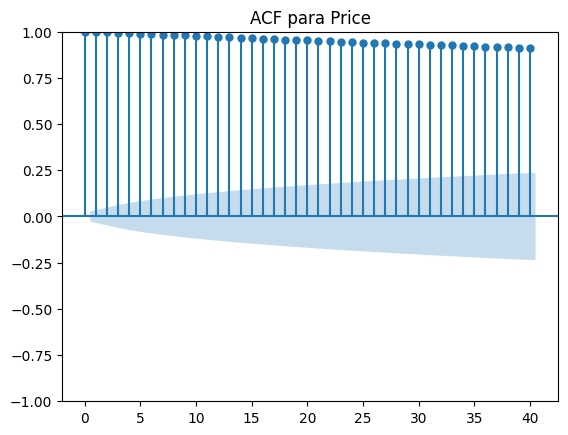

Resultado de la prueba de Ljung-Box (serie original):
Estadístico: 186935.7576, p-valor: 0.0000
Resultado de la prueba de Dickey-Fuller (serie original):
Estadístico ADF: -0.1731
p-valor: 0.9417
Valores críticos: {'1%': np.float64(-3.431671756434938), '5%': np.float64(-2.862124072118718), '10%': np.float64(-2.567080902520151)}

**La serie no es estacionaria. Procediendo a la Fase 2: Transformación y Verificación**



<Figure size 1000x500 with 0 Axes>

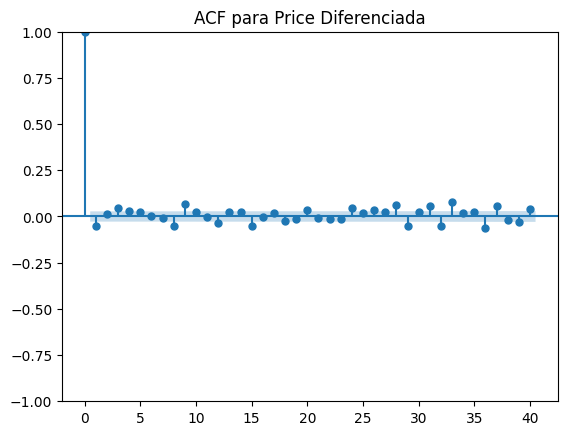

Resultado de la prueba de Ljung-Box (serie diferenciada):
Estadístico: 5262.4610, p-valor: 0.0000
Resultado de la prueba de Dickey-Fuller (serie diferenciada):
Estadístico ADF: -9.8319
p-valor: 0.0000
Valores críticos: {'1%': np.float64(-3.4316720236491136), '5%': np.float64(-2.862124190171984), '10%': np.float64(-2.5670809653646014)}

**La serie diferenciada es estacionaria.**


### Análisis de Estacionariedad para Retorno_Acumulado ###

**Fase 1: Análisis Inicial de Estacionariedad**



<Figure size 1000x500 with 0 Axes>

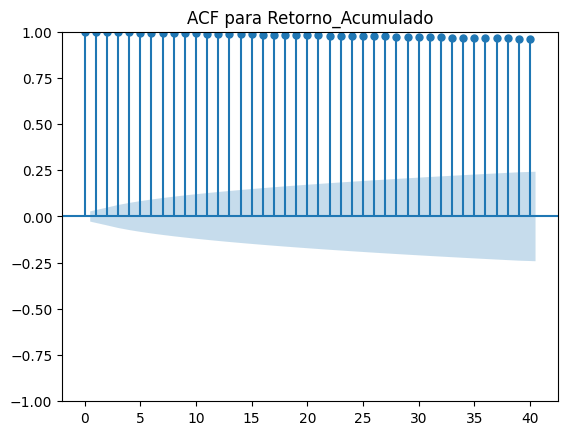

Resultado de la prueba de Ljung-Box (serie original):
Estadístico: 197442.8700, p-valor: 0.0000
Resultado de la prueba de Dickey-Fuller (serie original):
Estadístico ADF: -3.9089
p-valor: 0.0020
Valores críticos: {'1%': np.float64(-3.431665640184842), '5%': np.float64(-2.8621213700013244), '10%': np.float64(-2.567079464076049)}
**La serie original es estacionaria.**


### Análisis de Estacionariedad para Volatilidad_7 ###

**Fase 1: Análisis Inicial de Estacionariedad**



<Figure size 1000x500 with 0 Axes>

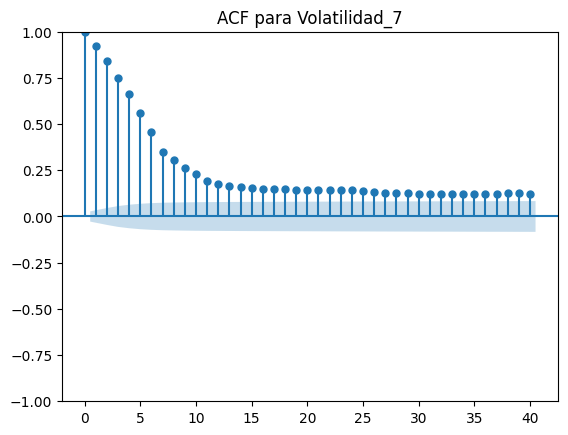

Resultado de la prueba de Ljung-Box (serie original):
Estadístico: 25008.0199, p-valor: 0.0000
Resultado de la prueba de Dickey-Fuller (serie original):
Estadístico ADF: -8.5951
p-valor: 0.0000
Valores críticos: {'1%': np.float64(-3.431671756434938), '5%': np.float64(-2.862124072118718), '10%': np.float64(-2.567080902520151)}
**La serie original es estacionaria.**



In [25]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, q_stat
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import warnings

# Evitar advertencias innecesarias
warnings.filterwarnings("ignore")

# Función para verificar estacionariedad y aplicar transformación si es necesario
def analizar_estacionariedad(df, columna, lags=40):
    print(f"\n### Análisis de Estacionariedad para {columna} ###\n")
    
    # Fase 1: Análisis Inicial
    print("**Fase 1: Análisis Inicial de Estacionariedad**\n")
    
    # Gráfico de ACF de la serie original
    plt.figure(figsize=(10, 5))
    plot_acf(df[columna].dropna(), lags=lags)
    plt.title(f"ACF para {columna}")
    plt.show()

    # Prueba de Ljung-Box en la serie original
    lb_stat, lb_pvalue = q_stat(acf(df[columna].dropna(), nlags=lags, fft=False), len(df[columna].dropna()))
    print("Resultado de la prueba de Ljung-Box (serie original):")
    print(f"Estadístico: {lb_stat[-1]:.4f}, p-valor: {lb_pvalue[-1]:.4f}")

    # Prueba de Dickey-Fuller en la serie original
    adf_result = adfuller(df[columna].dropna())
    print("Resultado de la prueba de Dickey-Fuller (serie original):")
    print(f"Estadístico ADF: {adf_result[0]:.4f}")
    print(f"p-valor: {adf_result[1]:.4f}")
    print(f"Valores críticos: {adf_result[4]}")

    # Fase 2: Transformación y Verificación
    if adf_result[1] > 0.05:
        print("\n**La serie no es estacionaria. Procediendo a la Fase 2: Transformación y Verificación**\n")
        
        # Diferenciar la serie
        df[f'{columna}_diff'] = df[columna].diff().dropna()
        
        # Gráfico de ACF de la serie diferenciada
        plt.figure(figsize=(10, 5))
        plot_acf(df[f'{columna}_diff'].dropna(), lags=lags)
        plt.title(f"ACF para {columna} Diferenciada")
        plt.show()

        # Prueba de Ljung-Box en la serie diferenciada
        lb_stat_diff, lb_pvalue_diff = q_stat(acf(df[f'{columna}_diff'].dropna(), nlags=lags, fft=False), len(df[f'{columna}_diff'].dropna()))
        print("Resultado de la prueba de Ljung-Box (serie diferenciada):")
        print(f"Estadístico: {lb_stat_diff[-1]:.4f}, p-valor: {lb_pvalue_diff[-1]:.4f}")

        # Prueba de Dickey-Fuller en la serie diferenciada
        adf_result_diff = adfuller(df[f'{columna}_diff'].dropna())
        print("Resultado de la prueba de Dickey-Fuller (serie diferenciada):")
        print(f"Estadístico ADF: {adf_result_diff[0]:.4f}")
        print(f"p-valor: {adf_result_diff[1]:.4f}")
        print(f"Valores críticos: {adf_result_diff[4]}")
        
        if adf_result_diff[1] <= 0.05:
            print("\n**La serie diferenciada es estacionaria.**\n")
        else:
            print("\n**La serie diferenciada aún no es estacionaria.**\n")
    else:
        print("**La serie original es estacionaria.**\n")

# Aplicar el análisis a los tres conjuntos de datos
conjuntos = ['Price', 'Retorno_Acumulado', 'Volatilidad_7']
for conjunto in conjuntos:
    analizar_estacionariedad(Historial_precios, conjunto)


### Interpretación de Resultados de Estacionariedad

#### Análisis de Estacionariedad para la Serie Original de `Price`
1. **ACF de la Serie Original**: La función de autocorrelación muestra una alta correlación en todos los rezagos, indicando una fuerte dependencia temporal.
2. **Pruebas de Estacionariedad**:
   - **Ljung-Box**: El estadístico es muy alto y el p-valor es prácticamente cero, sugiriendo una correlación serial significativa y, por lo tanto, falta de independencia entre los rezagos.
   - **Dickey-Fuller**: El valor del estadístico ADF es mayor que los valores críticos, y el p-valor es elevado **(0.9417)**, indicando que no se rechaza la hipótesis nula de no estacionariedad.
   
   **Conclusión**: La serie `Price` no es estacionaria en su forma original. 


#### Análisis de Estacionariedad para `Retorno_Acumulado`
1. **ACF de la Serie Original**: La serie muestra una alta autocorrelación en todos los rezagos.
2. **Pruebas de Estacionariedad**:
   - **Ljung-Box**: Estadístico muy alto y p-valor cero, indicando una correlación significativa.
   - **Dickey-Fuller**: El valor del estadístico ADF es menor que los valores críticos, y el p-valor es bajo (**0.0020)**, rechazando la hipótesis de no estacionariedad.
   
   **Conclusión**: La serie `Retorno_Acumulado` es estacionaria en su forma original.



#### Análisis de Estacionariedad para `Volatilidad_7`
1. **ACF de la Serie Original**: La autocorrelación disminuye gradualmente, indicando una dependencia temporal.
2. **Pruebas de Estacionariedad**:
   - **Ljung-Box**: Estadístico elevado y p-valor cero, sugiriendo correlación significativa.
   - **Dickey-Fuller**: El estadístico ADF es menor que los valores críticos, y el p-valor es prácticamente cero, rechazando la hipótesis de no estacionariedad.
   
   **Conclusión**: La serie `Volatilidad_7` es estacionaria en su forma original.



### Resumen Final
- **`Price`**: No estacionaria en su forma original, requiere diferenciación.
- **`Retorno_Acumulado` y `Volatilidad_7`**: Ambas series son estacionarias en su forma original. 


### Análisis Estadístico por Agrupación y Cálculo de Estadísticos Móviles

El objetivo es analizar el comportamiento de la media y la desviación estándar de la serie de tiempo agrupando los datos por días, semanas y meses. Además, se calculan estadísticos móviles sobre estas agrupaciones para obtener una visión dinámica del comportamiento de la serie en diferentes períodos. Finalmente, se genera una distribución de frecuencias para diferentes rezagos (**lags**) para observar la dispersión de los datos y su variabilidad temporal.

A continuación, el código realiza los siguientes pasos:

1. Agrupación de los datos por días, semanas y meses.
2. Cálculo de la media y desviación estándar para cada agrupación.
3. Cálculo de estadísticas móviles (media y desviación estándar móviles).
4. Visualización de la distribución de frecuencias para diferentes rezagos.


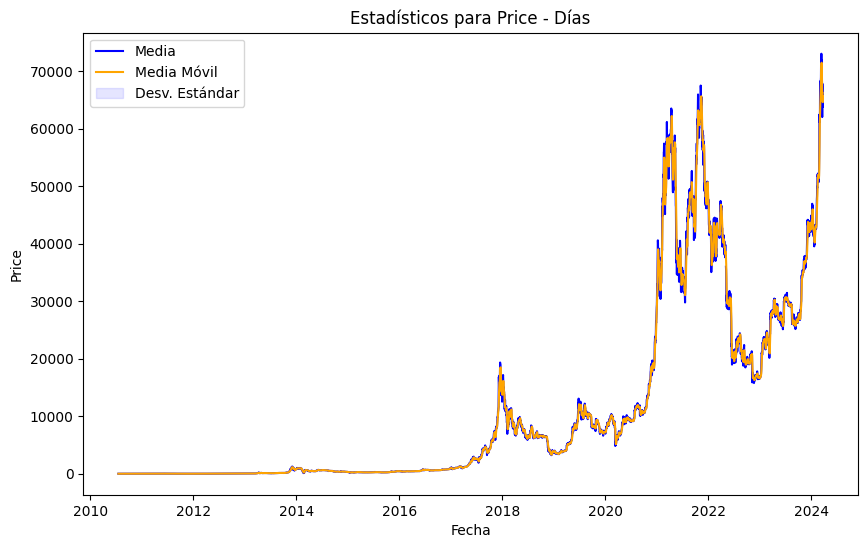

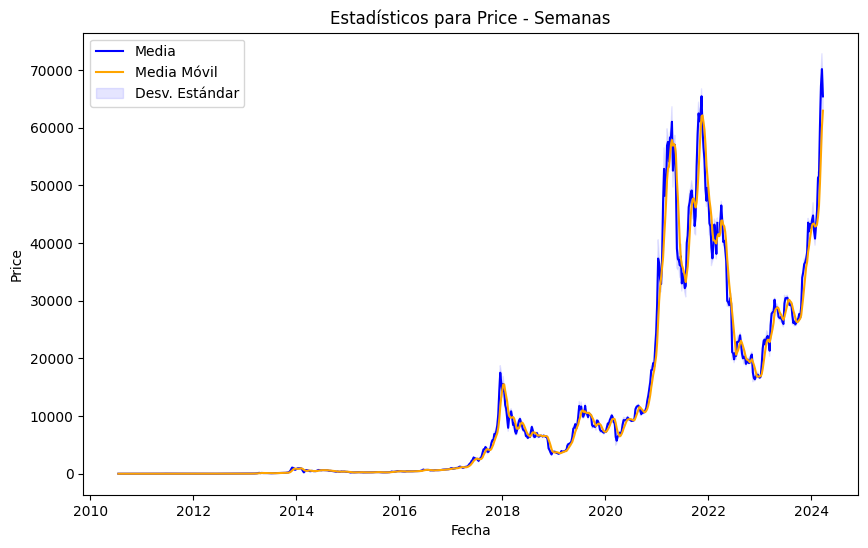

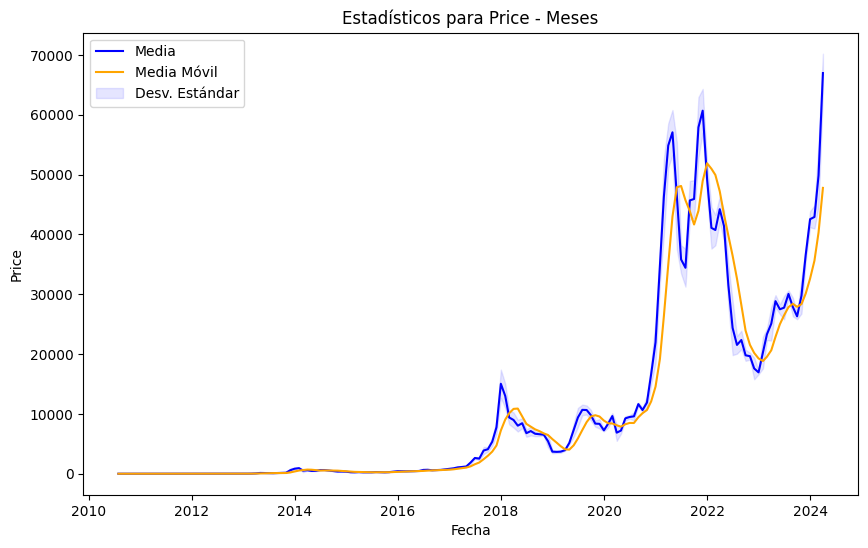

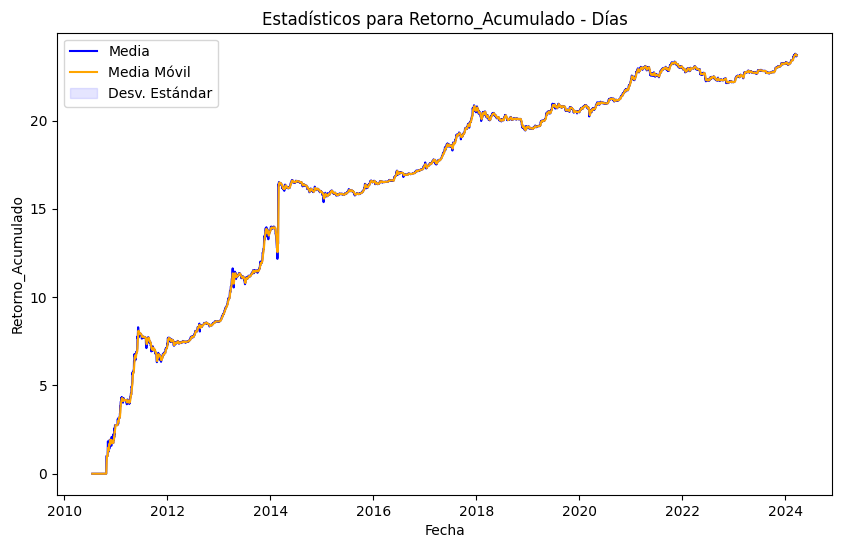

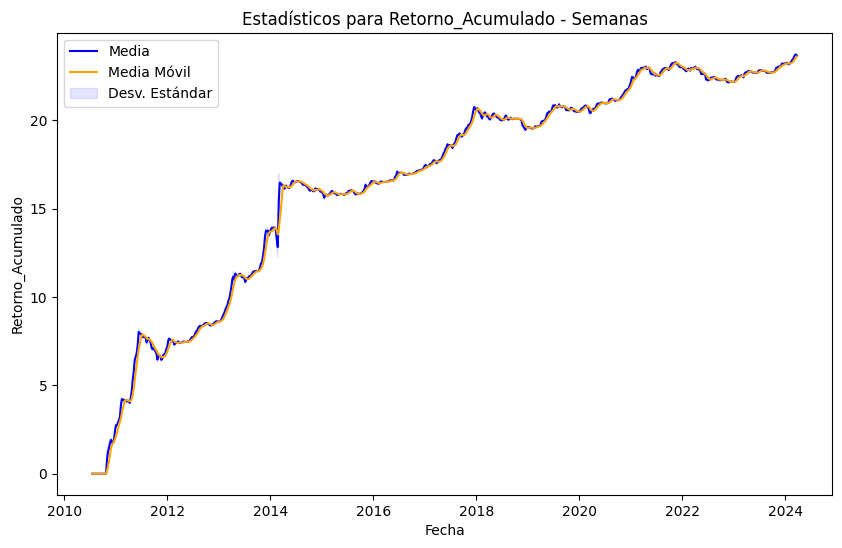

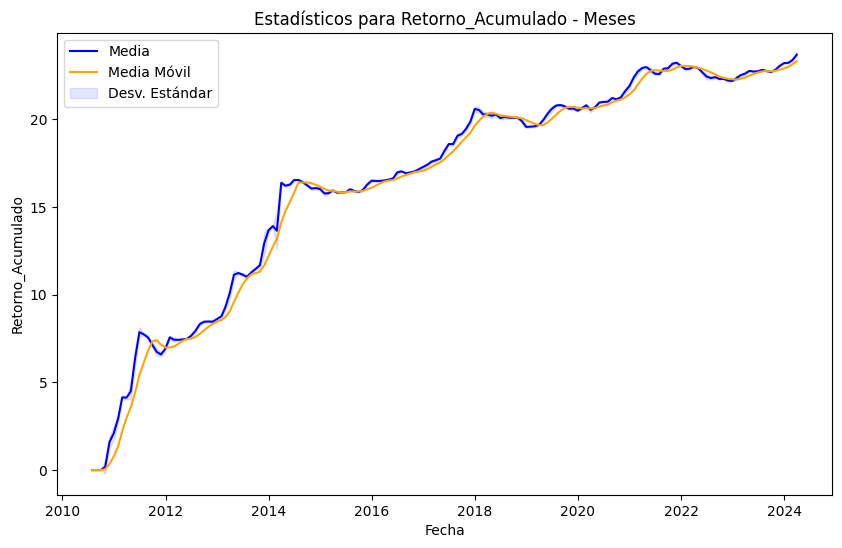

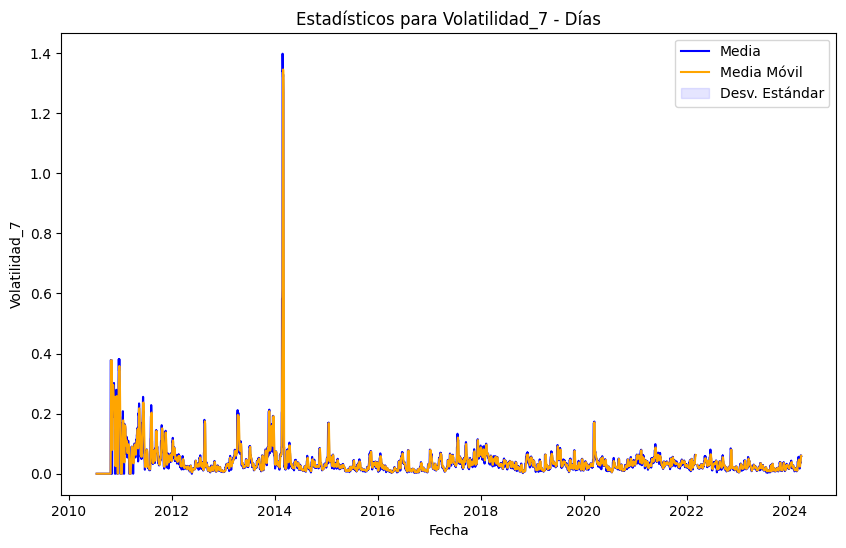

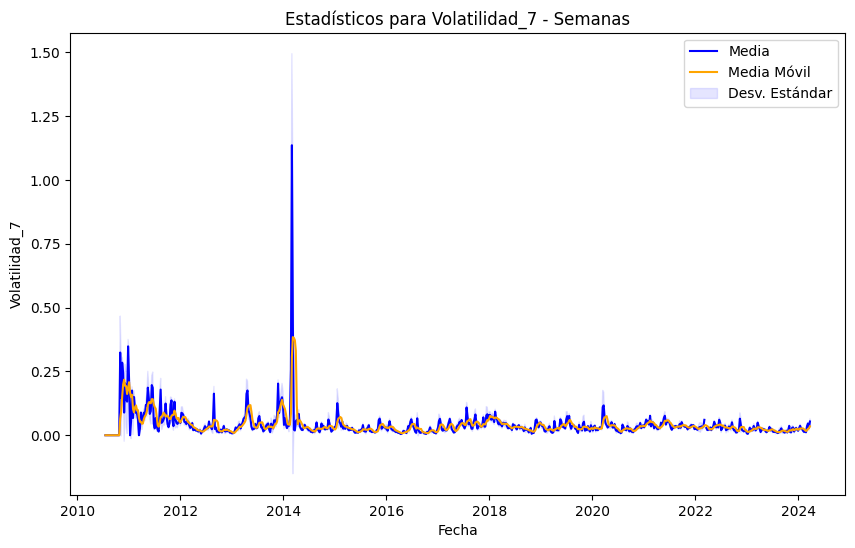

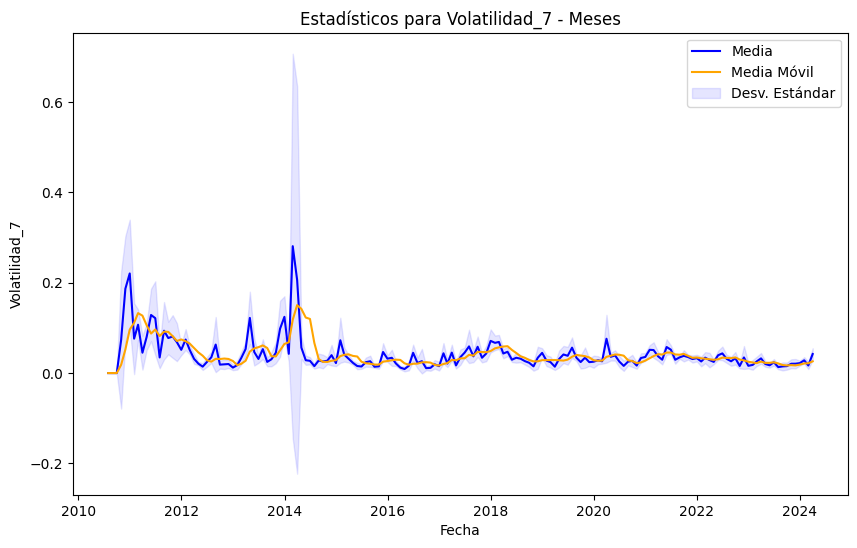

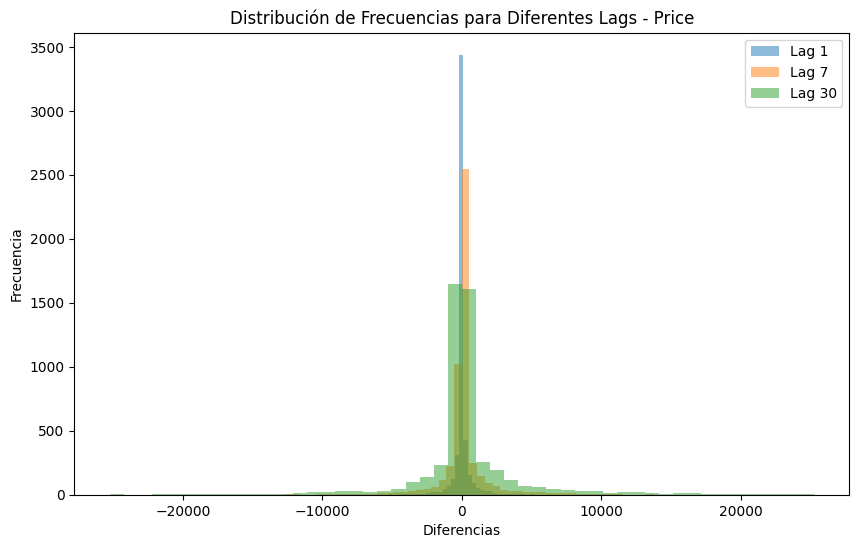

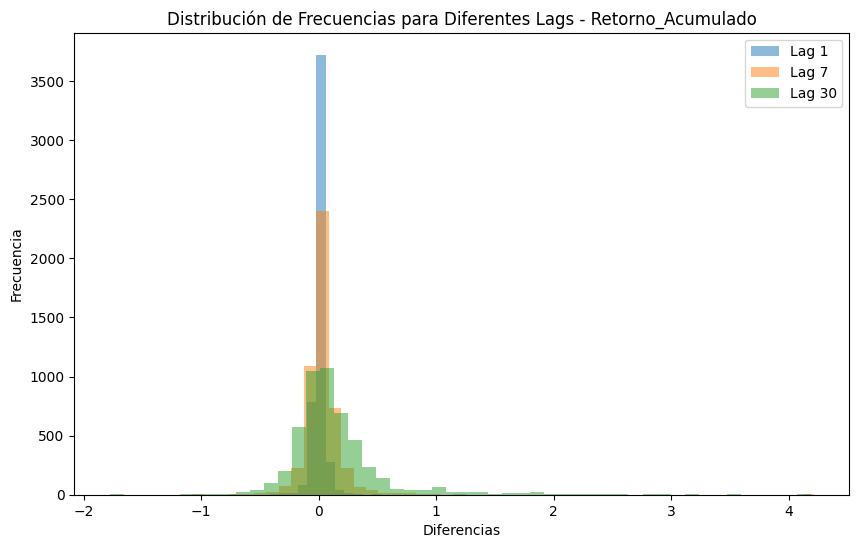

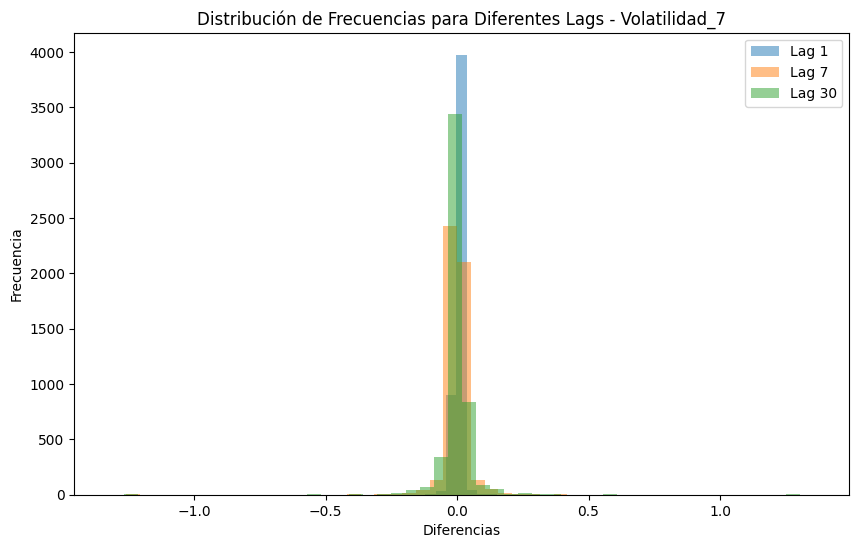

In [27]:


# Función para agrupar datos y calcular estadísticas
def calcular_agrupaciones(df, columna, frecuencia):
    agrupado = df[columna].resample(frecuencia).agg(['mean', 'std'])
    agrupado['media_movil'] = agrupado['mean'].rolling(window=5, min_periods=1).mean()
    agrupado['desv_movil'] = agrupado['std'].rolling(window=5, min_periods=1).mean()
    return agrupado

# Lista de columnas y frecuencias a analizar
conjuntos = ['Price', 'Retorno_Acumulado', 'Volatilidad_7']
frecuencias = {'D': 'Días', 'W': 'Semanas', 'M': 'Meses'}

# Calcular y graficar estadísticas para cada conjunto y frecuencia
for conjunto in conjuntos:
    for freq_code, freq_name in frecuencias.items():
        agrupacion = calcular_agrupaciones(Historial_precios, conjunto, freq_code)
        
        # Graficar agrupaciones
        plt.figure(figsize=(10, 6))
        plt.plot(agrupacion['mean'], label='Media', color='blue')
        plt.plot(agrupacion['media_movil'], label='Media Móvil', color='orange')
        plt.fill_between(agrupacion.index, agrupacion['mean'] - agrupacion['std'], agrupacion['mean'] + agrupacion['std'], 
                         color='blue', alpha=0.1, label='Desv. Estándar')
        plt.title(f'Estadísticos para {conjunto} - {freq_name}')
        plt.xlabel('Fecha')
        plt.ylabel(conjunto)
        plt.legend()
        plt.show()

# Función para graficar la distribución de frecuencias para diferentes lags
def graficar_distribucion_frecuencia(df, columna, lags):
    plt.figure(figsize=(10, 6))
    for lag in lags:
        plt.hist(df[columna].diff(lag).dropna(), bins=50, alpha=0.5, label=f'Lag {lag}')
    plt.title(f'Distribución de Frecuencias para Diferentes Lags - {columna}')
    plt.xlabel('Diferencias')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

# Dibujar distribuciones de frecuencias para lags de 1, 7 y 30 días para cada conjunto
lags = [1, 7, 30]
for conjunto in conjuntos:
    graficar_distribucion_frecuencia(Historial_precios, conjunto, lags)

### Interpretación General de las Distribuciones de Frecuencias por Lags para los Conjuntos de Datos

1. **Conjunto `Price`**
   - En los gráficos de distribución de diferencias para los lags 1, 7 y 30, se observa que la mayoría de las diferencias se concentran en torno a valores cercanos a cero. Esto indica que los cambios diarios en el precio son relativamente estables, y cualquier variación significativa tiende a revertirse rápidamente.
   - Las distribuciones son simétricas con una dispersión creciente a medida que el lag aumenta, lo cual es característico en series de tiempo de precios donde los cambios están correlacionados en el corto plazo.

2. **Conjunto `Retorno_Acumulado`**
   - Las diferencias para los lags 1, 7 y 30 en el retorno acumulado también muestran una concentración cerca de cero, lo que sugiere que los cambios en el retorno acumulado diario son limitados.
   - Este patrón indica una estabilidad acumulativa en los retornos diarios, con pocas variaciones bruscas en el tiempo. La forma de la distribución se mantiene similar en todos los lags, lo cual es indicativo de una tendencia de acumulación sin volatilidad significativa.

3. **Conjunto `Volatilidad_7`**
   - La volatilidad semanal (Volatilidad_7) muestra una distribución de diferencias muy estrecha y simétrica, cercana a cero en los tres lags. Esto refleja que la volatilidad es un factor que se mantiene constante en el tiempo, con pocas oscilaciones abruptas.
   - La baja dispersión alrededor de cero en lags superiores confirma la estabilidad de la volatilidad semanal, con variaciones mínimas día a día.
  - La volatilidad semanal muestra un comportamiento altamente constante, con distribuciones muy concentradas alrededor de cero. 

**Conclusión:** En general, los tres conjuntos de datos muestran un comportamiento estable, sin variaciones extremas en los cambios diarios, semanales o mensuales. Esto sugiere un alto grado de estacionariedad en las diferencias.


###  Descomposición de la Serie Temporal y Verificación de Residuos

La descomposición de la serie temporal permite desglosar la serie original en tres componentes principales:
- **Tendencia**: Muestra la dirección general de la serie a lo largo del tiempo.
- **Estacionalidad**: Refleja patrones repetitivos a intervalos regulares.
- **Residuales**: Son las variaciones no explicadas por la tendencia o estacionalidad.

Usaremos `statsmodels.tsa.seasonal_decompose` para llevar a cabo esta descomposición.

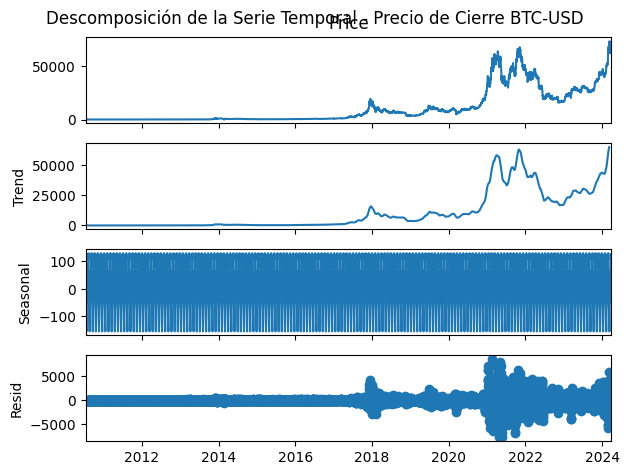

Prueba de Ljung-Box en los Residuos para Precio de Cierre BTC-USD:
Estadístico: 7996.2933507225825, p-valor: 0.0


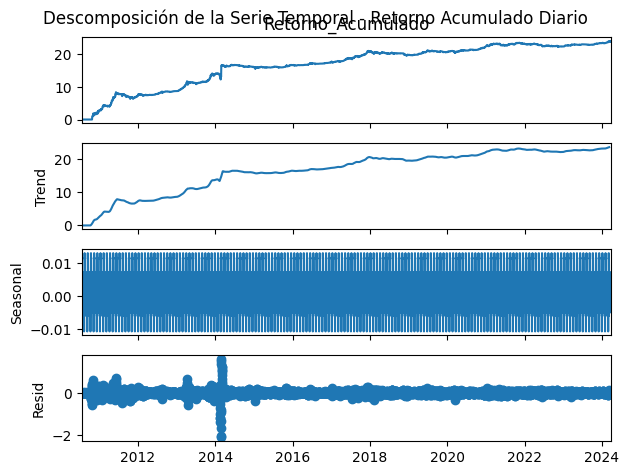

Prueba de Ljung-Box en los Residuos para Retorno Acumulado Diario:
Estadístico: 8001.254196084856, p-valor: 0.0


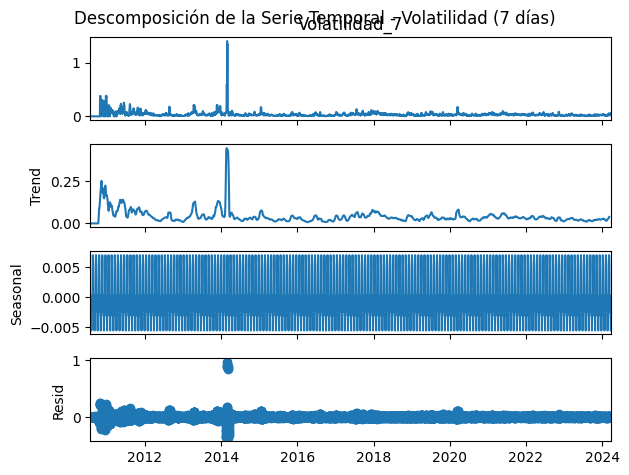

Prueba de Ljung-Box en los Residuos para Volatilidad (7 días):
Estadístico: 10760.712038195155, p-valor: 0.0


In [48]:
import pandas as pd

# Paso 1: Cargar el archivo CSV en el DataFrame
Historial_precios = pd.read_csv("Bitcoin_Historical_Data.csv")

# Paso 2: Limpiar las columnas numéricas eliminando comas y caracteres no numéricos
num_cols = ['Price', 'Open', 'High', 'Low', 'Change %']
for col in num_cols:
    Historial_precios[col] = Historial_precios[col].replace({',': '', '%': ''}, regex=True)
    Historial_precios[col] = pd.to_numeric(Historial_precios[col], errors='coerce')  # Convertir a numérico

# Paso 3: Convertir la columna de fecha a formato datetime y establecerla como índice
Historial_precios['Date'] = pd.to_datetime(Historial_precios['Date'], errors='coerce')
Historial_precios.set_index('Date', inplace=True)

# Paso 4: Ordenar el DataFrame por fecha en orden ascendente para calcular correctamente los retornos
Historial_precios.sort_index(inplace=True)

# Paso 5: Calcular el retorno diario y agregarlo como una columna 'Retorno_Diario'
Historial_precios['Retorno_Diario'] = Historial_precios['Price'].pct_change()

# Paso 6: Calcular el retorno acumulado y agregarlo como 'Retorno_Acumulado'
Historial_precios['Retorno_Acumulado'] = Historial_precios['Retorno_Diario'].cumsum()

# Paso 7: Calcular la volatilidad para cada ventana y agregarla al DataFrame
ventanas = [7, 14, 21, 28]
for ventana in ventanas:
    Historial_precios[f'Volatilidad_{ventana}'] = Historial_precios['Retorno_Diario'].rolling(window=ventana).std()

if 'Date' in Historial_precios.columns:
    Historial_precios['Date'] = pd.to_datetime(Historial_precios['Date'], errors='coerce')
    Historial_precios.set_index('Date', inplace=True)

# Función para descomponer la serie y realizar la prueba de Ljung-Box en los residuos
def analizar_descomposicion_y_residuos(serie, nombre):
    # Eliminar valores nulos en la serie original
    serie = serie.dropna()  
    
    # Descomposición de la serie temporal usando descomposición aditiva
    descomposicion = seasonal_decompose(serie, model='additive', period=30)  # Ajuste del periodo según la frecuencia esperada

    # Graficar los componentes de la descomposición
    descomposicion.plot()
    plt.suptitle(f"Descomposición de la Serie Temporal - {nombre}")
    plt.show()

    # Verificación de la independencia de los residuos
    residuos = descomposicion.resid.dropna()
    ljung_box_residuos = sm.stats.acorr_ljungbox(residuos, lags=[10], return_df=True)
    print(f"Prueba de Ljung-Box en los Residuos para {nombre}:")
    print(f"Estadístico: {ljung_box_residuos['lb_stat'].values[0]}, p-valor: {ljung_box_residuos['lb_pvalue'].values[0]}")
    print("="*50)

# Cargar las series de los tres conjuntos de datos
price_series = Historial_precios['Price']
retorno_acumulado_series = Historial_precios['Retorno_Acumulado']
volatilidad_series = Historial_precios['Volatilidad_7']

# Aplicar el análisis a cada conjunto de datos sin transformaciones previas
analizar_descomposicion_y_residuos(price_series, "Precio de Cierre BTC-USD")
analizar_descomposicion_y_residuos(retorno_acumulado_series, "Retorno Acumulado Diario")
analizar_descomposicion_y_residuos(volatilidad_series, "Volatilidad (7 días)")

### Interpretación de la Descomposición de la Serie Temporal y Prueba de Independencia en Residuos

1. **Precio de Cierre BTC-USD**:
   - La serie presenta una tendencia ascendente significativa a partir de 2016, acentuada especialmente en períodos de alta volatilidad como 2017 y 2020-2021.
   - La componente estacional muestra variaciones constantes, mientras que los residuos indican episodios de alta variabilidad que coinciden con los picos en la serie original.

2. **Retorno Acumulado Diario**:
   - Se observa una tendencia creciente en el retorno acumulado, aunque con menor variabilidad que la serie de precios. La estacionalidad es mínima, y los residuos se mantienen relativamente estables, salvo por algunas fluctuaciones alrededor de 2013.

3. **Volatilidad (7 días)**:
   - La serie de volatilidad presenta una tendencia moderada con episodios de alta volatilidad en 2014 y 2020, como es esperable en el mercado de criptomonedas. La estacionalidad es baja, y los residuos sugieren independencia en su mayor parte, salvo excepciones puntuales.

#### Prueba de Ljung-Box en los Residuos

La prueba de Ljung-Box aplicada a los residuos de cada serie nos arroja los siguientes resultados:

- **Precio de Cierre BTC-USD**: Estadístico = 7996.29, p-valor = 0.0
- **Retorno Acumulado Diario**: Estadístico = 8001.25, p-valor = 0.0
- **Volatilidad (7 días)**: Estadístico = 10760.71, p-valor = 0.0

Dado que los p-valores son significativamente bajos (0.0), rechazamos la hipótesis nula de independencia en los residuos. Esto indica que aún existe autocorrelación en los residuos de las series, lo cual sugiere la necesidad de un modelado adicional para capturar completamente la dependencia temporal en las observaciones.

#### Conclusión

La descomposición de las series tamporales muestra tendencias y estacionalidades consistentes con el comportamiento del mercado de criptomonedas. Sin embargo, la falta de independencia en los residuos implica que estas series podrían beneficiarse de técnicas adicionales de modelado para mejorar la captura sus tendecias.
